
# UNHCR Forcibly Displaced Populations Casptone Project

## Support Vector Machine (SVM) classification - Linear Kernel

---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn import preprocessing
import scikitplot as skplt
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/Users/dayosangowawa/Desktop/GA/DSI20-lessons/projects/project-capstone/My Capstone/Forcibly displaced persons - Capstone Dayo Sangowawa/cleaned_unhcrdf_final.csv')
df.head()

,Unnamed: 0,country_of_origin,country_of_asylum,population_type,urban_or_rural_location,accommodation_type,female_aged_0-4 years,female_aged_5-11 years,female_aged_12-17 years,female_aged_18-59 years,female_aged_over_60_years,male_aged_0-4_years,male_aged_5-11_years,male_aged_12-17 years,male_aged_18-59_years,male_aged_over_60_years
0,0,Colombia,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,5,0
1,1,Cuba,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,0,0
2,2,Afghanistan,Afghanistan,IDP,Rural,I,0,14,16,37,0,0,15,17,38,5
3,3,Afghanistan,Afghanistan,IDP,Urban,Q,74,810,853,2004,140,75,840,921,2278,206
4,4,Afghanistan,Afghanistan,IDP,Urban,Q,12,130,138,321,21,12,135,147,365,33


In [9]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [10]:
y = df.pop('accommodation_type')
X = pd.get_dummies(df, drop_first=True)

In [11]:
print('Baseline prediction: ', y.value_counts(normalize=True).max())

Baseline prediction:  0.8497186815375424


In [12]:
lb = preprocessing.LabelBinarizer()

In [13]:
y = lb.fit_transform(y)

#'0 'if it is 'I 'and '1' if it is 'other'. 

In [14]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [15]:
y = y.ravel()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

### GridSearch

In [20]:
lsvc = LinearSVC()

In [21]:
params = {'penalty': ['l1', 'l2'], 
        'loss' :['hinge', 'squared_hinge'],
         'C': np.linspace(1, 2, 10)}

In [22]:
lsvc_gs = GridSearchCV(estimator= lsvc, param_grid=params, cv=5)

In [23]:
lsvc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ]),
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [24]:
lsvc_gs.best_params_

{'C': 1.1111111111111112, 'loss': 'hinge', 'penalty': 'l2'}

### Using the best parameters from the Grid Search 

In [25]:
lsvc_best = LinearSVC(C = 1.1111111111111112, loss = 'hinge', penalty= 'l2')

In [26]:
lsvc_best.fit(X_train, y_train)

LinearSVC(C=1.1111111111111112, loss='hinge')

In [27]:
print('Accuracy score - train set:', lsvc_best.score(X_train, y_train))
print('Accuracy score - test set:', lsvc_best.score(X_test, y_test))
print('Mean CV score - train: ', cross_val_score(lsvc_best, X_train, y_train, cv=5).mean())

Accuracy score - train set: 0.9248148378664343
Accuracy score - test set: 0.9244461040577545
Mean CV score - train:  0.922558725624463


### Evaluation

In [28]:
y_test_pred = lsvc_best.predict(X_test)

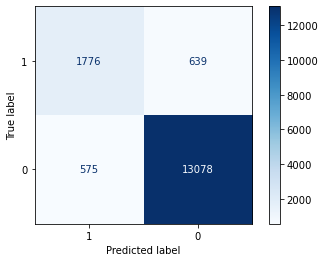

In [29]:
confus_matrix = plot_confusion_matrix(lsvc_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.savefig('rfc_confusion_matrix.png', dpi=300, bbox_inches = "tight")
plt.show()

In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     13653
           1       0.76      0.74      0.75      2415

    accuracy                           0.92     16068
   macro avg       0.85      0.85      0.85     16068
weighted avg       0.92      0.92      0.92     16068



In [31]:
y_train_pred = lsvc_best.predict(X_train)

In [32]:
print('Area under the curve : ', roc_auc_score(y_train, y_train_pred))

Area under the curve :  0.8450459742607543
